# Exercise Week 34
## Exercise 2: Making your own data and exploring scikit-learn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
n = 100
x = np.random.rand(n,1)
idx = np.argsort(x, axis=0).flatten()
x = x[idx] # Always sort sooner rather than later
y = 2.0+5*x*x+0.1*np.random.randn(n,1)

### 1. My Code

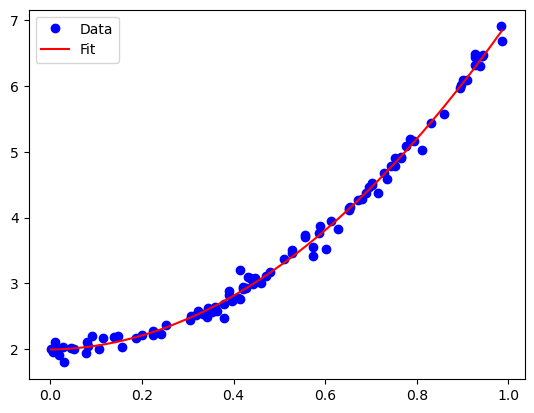

In [3]:
# Design matrix
X = np.ones((n,3))
X[:,1] = x.flatten()
X[:,2] = x.flatten()**2

# Coefficients and model
β = np.linalg.inv(X.T @ X) @ X.T @ y
y_pred = X @ β

plt.plot(x,y, "bo", label="Data")
plt.plot(x, y_pred, "r", label="Fit")
plt.legend()
plt.show()

### 2. Scikit-learn

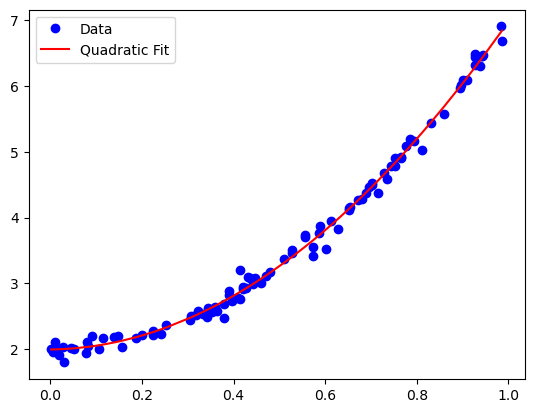

In [4]:
poly2 = PolynomialFeatures(degree=2).fit(x, y)
X = poly2.fit_transform(x)

# Penta line fit (?)
plf5 = LinearRegression().fit(X, y)
y_pred = plf5.predict(X)

plt.plot(x, y, 'bo', label='Data')
plt.plot(x, y_pred, "r", label="Quadratic Fit")
plt.legend()
plt.show()

### 3. $MSE$ & $R^2$
**Mean Squared Errror $\big(χ²\big)$**: A function which measures the average square error between our prediction and the data. With more datapins $n$, we can have more confidence in our model. This should be minimized.
$$
χ(\vec{y}, \tilde{y}) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \tilde{y}_i)^2
$$

**$R²$**: A function which measures how well our model can predict new values. The max score is 1, and the worst score is $-∞$. A score of 0 means the same y-value for all predictions.
$$
R²(\vec{y}, \tilde{\vec{y}}) = 1 - \frac{\sum_{i=1}^{n} (y_i - \tilde{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$



In [5]:
MSE = mean_squared_error(y, y_pred)
R2 = r2_score(y, y_pred)
print(f'{MSE = :.2e}, {R2 = :.2%}')

MSE = 1.01e-02, R2 = 99.51%


## Exercise 3: Split data in test and training data
### a) Manual 5-deg polynomial design matrix and split

In [6]:
np.random.seed()
n = 100
# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1, x.shape)

# Manual design matrix 
X = np.ones((n, 5))
X[:,1] = x.flatten() 
X[:,2] = x.flatten()**2 
X[:,3] = x.flatten()**3
X[:,4] = x.flatten()**4

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
β = np.linalg.inv(X.T @ X) @ X.T @ y


### b) Predictions and MSE calculation

In [7]:
y_tilde = X_train @ β
y_pred = X_test @ β

MSE_train = mean_squared_error(y_train, y_tilde)
MSE_test = mean_squared_error(y_test, y_pred)

print(f'{MSE_train = :.2e}')
print(f'{MSE_test = :.2e}')

MSE_train = 3.04e-02
MSE_test = 2.92e-02


### c) Scikit-learn 15-deg polynomial design matrix and split

In [8]:
poly15 = PolynomialFeatures(degree=15).fit(x, y)
X = poly15.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Sorting columns as values are picked at random
idx_train = np.argsort(X_train[:,1])
idx_test = np.argsort(X_test[:,1])
X_test = X_test[idx_test]
X_train = X_train[idx_train]

β = np.linalg.inv(X.T @ X) @ X.T @ y

y_tilde = X_train @ β
y_pred = X_test @ β

MSE_train = mean_squared_error(y_train, y_tilde)
MSE_test = mean_squared_error(y_test, y_pred) 

print(F'{MSE_train = :.2e}')
print(F'{MSE_test = :.2e}')

MSE_train = 4.81e-01
MSE_test = 3.92e-01


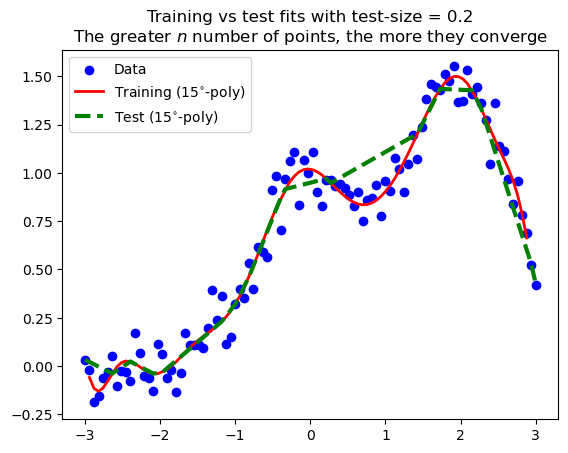

In [9]:
plt.scatter(x, y, c="b", label="Data")

plt.plot(X_train[:,1], y_tilde, c="r", label="Training ($15^{\circ}$-poly)", linewidth=2)
plt.plot(X_test[:,1], y_pred, c="green", label="Test ($15^{\circ}$-poly)", linewidth=3, linestyle='--')
plt.legend()
plt.title(f'Training vs test fits with test-size = 0.2\nThe greater $n$ number of points, the more they converge')
plt.show()

### Conclusion
- The greater the number $n$ of data points, the more accurate our model will be. With a high $n$, the test and training data was more similar. 
- The MSE was consistently lower for the 5th degree polynomial by an order of magnitude, as $\text{MRE}_5 ≈ 10^{-2}$ and $\text{MRE}_{15} ≈ 10^{-1}$. This might shows that the 15th degree polynomial is overfitting the data.